In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
from numpy.random import rand, randn

In [81]:
n, d, k = 1000, 2, 2

In [82]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5 , -rand(d) * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([0.55026385, 0.91195728]), array([0.1153411 , 0.22940708])]
[array([[0.01278471, 0.        ],
       [0.        , 0.16223431]]), array([[0.01278471, 0.        ],
       [0.        , 0.16223431]])]


Solution
===

In [83]:
def compute_log_p(X, mean, sigma):
    demeaned_X = X - mean  # automatic broadcasting
    inversed_sigma = np.linalg.inv(sigma)
    return (-2 * np.pi) ** (d / 2) - (0.5 * demeaned_X.dot(inversed_sigma) * demeaned_X).sum(axis=1)

In [84]:
def f1(X, means, sigmas):
    return [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]

log_ps = vect1(X, means, sigmas)

In [85]:
def f2(X, means, sigmas):
    return np.vectorize(compute_log_p, signature='(d),(d,d)->(n)', excluded=[0])(X, means, sigmas)

log_ps = vect2(X, means, sigmas)

In [86]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1
 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0
 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1
 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0
 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1
 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0
 1 1 0 0 0 0 0 0 1 1 0 1 

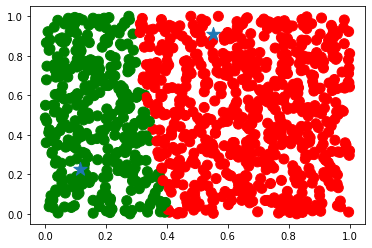

In [87]:
colors = np.array(['red', 'green'])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()

In [88]:
r1 = %timeit -o f1(X, means, sigmas)
r2 = %timeit -o f2(X, means, sigmas)

84.6 µs ± 1.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
212 µs ± 1.71 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


It's actually slower with vectorize...